In [10]:
#!pip install pandas

In [11]:
import os
import numpy as np
import cv2  
import glob 
from matplotlib import pyplot as plt
import joblib
import pandas as pd

In [8]:
#Changing Current Working Directory;
path = r"C:\Users\yashm\dev\ProjectPokemon"
def change_dir(path):
    retval = os.getcwd()    # Check current working directory.
    print("Current working directory ", retval) 
    os.chdir( path )   # Now change the directory.
    retval = os.getcwd() # Check current working directory.
    print ("Directory changed successfully ",retval) 
change_dir(path)

Current working directory  C:\Users\yashm\dev\ProjectPokemon
Directory changed successfully  C:\Users\yashm\dev\ProjectPokemon


In [ ]:
#saving model 
def save_mod(model,Model_name):
    change_dir(r"C:\Users\yashm\dev\ProjectPokemon")
    Model_name+='.sav'
    joblib.dump(model,Model_name)


In [63]:
# reading images from directory

def load_image(path):
    pokemonImages=list()
    pokemon = list()
    for image_path in glob.glob(path):
        #print(image_path[41:-4])
        pokemon.append(image_path[41:-4])
        img = cv2.imread(image_path,0)
        img = img.reshape(1,14400)
        img= img[0]
        img = img[3000:11401]
        pokemonImages.append(img)
        #lst.append(img)
    return pokemonImages,pokemon
    
temp = path + r"\images\*.*"
imagesPokemon, pokemon = load_image(temp)
print(len(imagesPokemon))

809


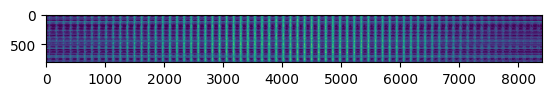

In [65]:
#print(pokemon)
plt.imshow(imagesPokemon)

In [70]:
csv = pd.read_csv(path+r"\pokemoreadytogo.csv")

In [94]:

csv = csv.sort_values(by=["Name"] )
csv = csv.reset_index(drop=True)

print(csv)

                Name    Type1    Type2
0          abomasnow    Grass      Ice
1               abra  Psychic  novalue
2              absol     Dark  novalue
3           accelgor      Bug  novalue
4    aegislash-blade    Steel    Ghost
..               ...      ...      ...
804          zoroark     Dark  novalue
805            zorua     Dark  novalue
806            zubat   Poison   Flying
807         zweilous     Dark   Dragon
808       zygarde-50   Dragon   Ground

[809 rows x 3 columns]


In [95]:
df = pd.DataFrame({"Name":pokemon,"Images":imagesPokemon})
print(df)


                Name                                             Images
0          abomasnow  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1               abra  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2              absol  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3           accelgor  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    aegislash-blade  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
..               ...                                                ...
804          zoroark  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
805            zorua  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
806            zubat  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
807         zweilous  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
808       zygarde-50  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

[809 rows x 2 columns]


In [99]:
result = pd.concat([df, csv], axis=1)
result = result.loc[:, ~result.columns.duplicated()]
result


,Name,Images,Type1,Type2
0,abomasnow,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Grass,Ice
1,abra,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Psychic,novalue
2,absol,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Dark,novalue
3,accelgor,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Bug,novalue
4,aegislash-blade,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Steel,Ghost
...,...,...,...,...
804,zoroark,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Dark,novalue
805,zorua,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Dark,novalue
806,zubat,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Poison,Flying
807,zweilous,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Dark,Dragon


In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [107]:
label_encoder = LabelEncoder()
df  = result
for column in df.columns:
    if(column=="Images"):
        continue
    if df[column].dtype == 'object':
        
        df[column] = label_encoder.fit_transform(df[column])

In [108]:
df


,Name,Images,Type1,Type2
0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,11
1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",14,18
2,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,18
3,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,18
4,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",16,8
...,...,...,...,...
804,804,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,18
805,805,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,18
806,806,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13,7
807,807,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,2


In [114]:
X = df["Images"]
Y1 = df["Type1"]
Y2 = df["Type2"]

In [117]:
X_train, X_test, y1_train, y1_test = train_test_split(X, Y1, test_size=0.2)

In [121]:
y1_train


0       9
647    11
770    17
334    12
783    17
       ..
171    13
759     9
677     9
179    10
520     0
Name: Type1, Length: 647, dtype: int32

In [118]:
model =  DecisionTreeClassifier()

In [122]:
X_train = X_train.values.tolist()
model.fit(X_train,y1_train)

DecisionTreeClassifier()

In [134]:
X_test


[array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 

In [129]:
X_test = X_test.values.tolist()
y_pred = model.predict(X_test)


In [132]:
accuracy = accuracy_score(y1_test, y_pred)

In [133]:
accuracy

0.07407407407407407